### Change Log for the k-Nearest Neighbors (kNN) Algorithm

This notebook was originally completed as a tutorial from [Real Python](https://realpython.com/knn-python/).

#### [1. Understanding the Algorithm](#algorithm-understanding)
- **Objective:**
  - The common thread in both applications lies in the utilization of the kNN algorithm for classification. In the original tutorial, the algorithm leverages the similarity in measurements to predict the age of abalones. Similarly, in my adaptation, the algorithm employs the similarity in word frequency counts to classify emails as spam or not.

- **Changes:**
  - Introduced a new objective for the kNN algorithm, shifting from predicting the age of abalones to classifying emails as spam or not.

#### [2. Data Understanding](#data-understanding)
- **Dataset Description:**
  - Original: The dataset used in the tutorial contains measurements such as Gender, Length, Diameter, and Weight of sea slugs.
  - Adaptation: The Spambase dataset is sourced from the Machine Learning Repository, focusing on word frequency counts in emails to determine if they are spam or not.

- **Changes:**
  - Described the transformation from a sea slug measurement dataset to a spam classification dataset.

#### [3. Data Preparation](#3-data-preparation)
- **Drop Unrequired Columns:**
  - Attempted to drop an unspecified column in the original tutorial. Commented out this action as it seemed unnecessary for the Spambase dataset.

- **Descriptive Statistics:**
  - Plotted a histogram to visualize the distribution of spam and non-spam emails in the Spambase dataset.

- **Changes:**
  - **Renaming Columns:**
    - In the adaptation, columns in the Spambase dataset were renamed for clarity and consistency.

    
#### [4. Modeling](#modeling)
- **Fit kNN Regression:**
  - Utilized the kNN regression model from scikit-learn to fit the Spambase dataset.

- **Inspect Model Fit:**
  - Evaluated the model fit using mean squared error on both training and test sets.

- **Plotting the Fit:**
  - Plotted the fit of the model, showcasing the distribution of predicted values.

- **Tune and Optimize kNN:**
  - Conducted grid search to find optimal parameters for kNN, specifically the number of neighbors.

- **Adding Weighted Average of Neighbors Based on Distance:**
  - Extended grid search to include different weightings for neighbors based on distance.

- **Bagging with kNN:**
  - Introduced bagging to further improve the kNN model's performance.

#### [5. Evaluation](#evaluation)
- **Challenges Encountered:**
  - No specific challenges mentioned.

#### [6. Deployment](#deployment)
  - No information provided in the current change log regarding deployment.

This change log captures the modifications made to the original tutorial notebook, highlighting the shift in objective, dataset, and adjustments to the kNN algorithm for the task of spam classification.


# The k-Nearest Neighbors (kNN) Algorithm in Python

- Liam Durkan
- C00264405
- 18/01/2024

Results presented at the bottom 

Begin by importing the Spambase Dataset

In [1]:
import pandas as pd
path = (
    "spambase.data"
)
spambase = pd.read_csv(path, header=None)

Renaming Columns

In [2]:
spambase.columns = [
"word_freq_make",
"word_freq_address",
"word_freq_all",
"word_freq_3d",
"word_freq_our",
"word_freq_over",
"word_freq_remove",
"word_freq_internet",
"word_freq_order",
"word_freq_mail",
"word_freq_receive",
"word_freq_will",
"word_freq_people",
"word_freq_report",
"word_freq_addresses",
"word_freq_free",
"word_freq_business",
"word_freq_email",
"word_freq_you",
"word_freq_credit",
"word_freq_your",
"word_freq_font",
"word_freq_000",
"word_freq_money",
"word_freq_hp",
"word_freq_hpl",
"word_freq_george",
"word_freq_650",
"word_freq_lab",
"word_freq_labs",
"word_freq_telnet",
"word_freq_857",
"word_freq_data",
"word_freq_415",
"word_freq_85",
"word_freq_technology",
"word_freq_1999",
"word_freq_parts",
"word_freq_pm",
"word_freq_direct",
"word_freq_cs",
"word_freq_meeting",
"word_freq_original",
"word_freq_project",
"word_freq_re",
"word_freq_edu",
"word_freq_table",
"word_freq_conference",
"char_freq_;",
"char_freq_(",
"char_freq_[",
"char_freq_!",
"char_freq_$",
"char_freq_#",
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"target"
]
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


Drop Unrequired Columns

In [3]:
#spambase = spambase.drop("", axis=1)

#### Descriptive Statistics From the Spambase Dataset

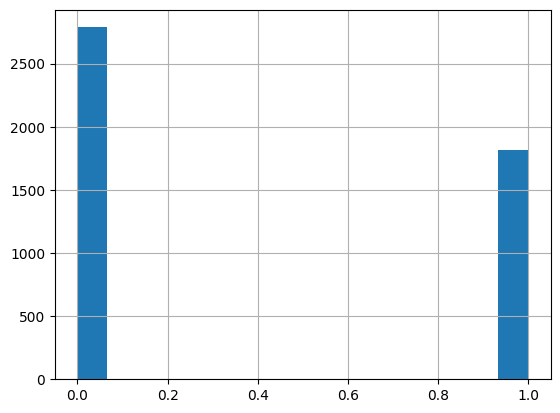

In [4]:
import matplotlib.pyplot as plt
spambase["target"].hist(bins=15)
plt.show()

In [5]:
correlation_matrix = spambase.corr()
correlation_matrix["target"]

word_freq_make                0.126208
word_freq_address            -0.030224
word_freq_all                 0.196988
word_freq_3d                  0.057371
word_freq_our                 0.241920
word_freq_over                0.232604
word_freq_remove              0.332117
word_freq_internet            0.206808
word_freq_order               0.231551
word_freq_mail                0.138962
word_freq_receive             0.234529
word_freq_will                0.007741
word_freq_people              0.132927
word_freq_report              0.060027
word_freq_addresses           0.195902
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_email               0.204208
word_freq_you                 0.273651
word_freq_credit              0.189761
word_freq_your                0.383234
word_freq_font                0.091860
word_freq_000                 0.334787
word_freq_money               0.216111
word_freq_hp                 -0.256723
word_freq_hpl            

### Fit kNN in Python Using scikit-learn

In [6]:
X = spambase.drop("target", axis=1)
X = X.values
y = spambase["target"]
y = y.values

Splitting Data Into Training and Test Sets for Model Evaluation

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345)

Fitting a kNN Regression in scikit-learn to the Spambase Dataset

In [8]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=7)

Creating an unfitted model using three of the nearest neighbours to predict the value of the data point 

In [9]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

### Using scikit-learn to Inspect Model Fit

We have our model fit, so now we can evaluate it

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.32279729286409825

In [11]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
Arbitrary_k = rmse
rmse

0.38694487985683385

### Plotting the Fit of Your Model

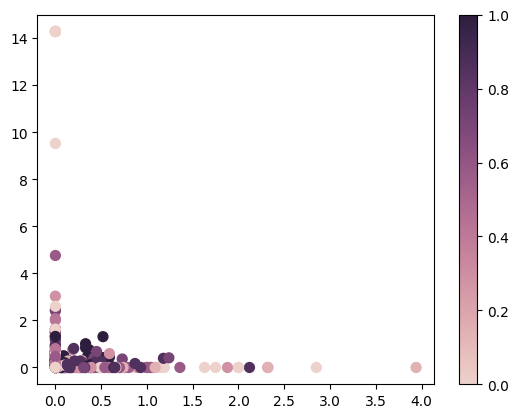

In [12]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

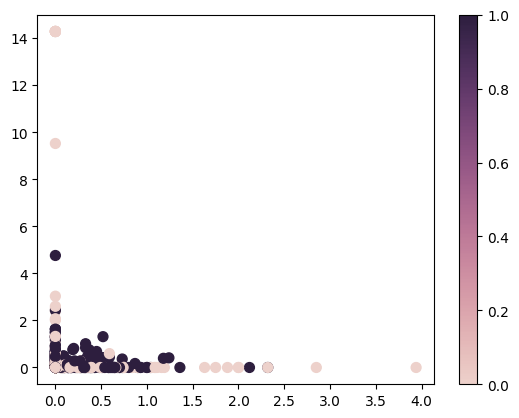

In [13]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

### Tune and Optimize kNN in Python Using scikit-learn

In [14]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [15]:
gridsearch.best_params_

{'n_neighbors': 7}

In [16]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
GridsearchCV_k = test_rmse
print(train_rmse)
print(test_rmse)

0.32279729286409825
0.38694487985683385


Adding Weighted Average of Neighbors Based on Distance


In [17]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
GridsearchCV_k_weights = test_rmse
test_rmse

0.3529176019362071

Further Improving on kNN in scikit-learn With Bagging

In [18]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k, weights=best_weights)

In [19]:
from sklearn.ensemble import BaggingRegressor
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [20]:
bagging_model.fit(X_train, y_train)

test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
Bagging_and_GridSearchCV = test_rmse
test_rmse

0.35477504111416547

#### Results

In [21]:
print("Arbitrary k: ", Arbitrary_k)
print("GridSearchCV for k: ", GridsearchCV_k )
print("GridSearchCV for k and weights: ", GridsearchCV_k_weights)
print("Bagging and GridSearchCV: ", Bagging_and_GridSearchCV)

Arbitrary k:  0.38694487985683385
GridSearchCV for k:  0.38694487985683385
GridSearchCV for k and weights:  0.3529176019362071
Bagging and GridSearchCV:  0.35477504111416547


In [22]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from math import sqrt
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

#### 1. Understanding the Algorithm <a id='algorithm-understanding'></a>

### Example: 

To demonstrate support vector machines in action, I will do similar 

#### 2. Data Understanding <a id='data-understanding'></a>

The data set is taken from 

CSV Files:
 - 
 - 
 
Directories:
- 
- 

In [23]:
path = (
    "spambase.data"
)
spambase = pd.read_csv(path, header=None)

#### 3. Data Preparation <a id='data-preparation'></a>

In [24]:
# Renaming columns 

spambase.columns = [
"word_freq_make",
"word_freq_address",
"word_freq_all",
"word_freq_3d",
"word_freq_our",
"word_freq_over",
"word_freq_remove",
"word_freq_internet",
"word_freq_order",
"word_freq_mail",
"word_freq_receive",
"word_freq_will",
"word_freq_people",
"word_freq_report",
"word_freq_addresses",
"word_freq_free",
"word_freq_business",
"word_freq_email",
"word_freq_you",
"word_freq_credit",
"word_freq_your",
"word_freq_font",
"word_freq_000",
"word_freq_money",
"word_freq_hp",
"word_freq_hpl",
"word_freq_george",
"word_freq_650",
"word_freq_lab",
"word_freq_labs",
"word_freq_telnet",
"word_freq_857",
"word_freq_data",
"word_freq_415",
"word_freq_85",
"word_freq_technology",
"word_freq_1999",
"word_freq_parts",
"word_freq_pm",
"word_freq_direct",
"word_freq_cs",
"word_freq_meeting",
"word_freq_original",
"word_freq_project",
"word_freq_re",
"word_freq_edu",
"word_freq_table",
"word_freq_conference",
"char_freq_;",
"char_freq_(",
"char_freq_[",
"char_freq_!",
"char_freq_$",
"char_freq_#",
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"target"
]
spambase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,target
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [25]:
# Drop unrequired columns 
#spambase = spambase.drop("", axis=1)

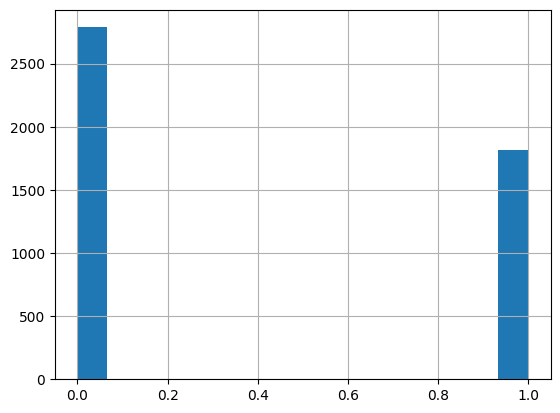

In [26]:
spambase["target"].hist(bins=15)
plt.show()

In [27]:
correlation_matrix = spambase.corr()
correlation_matrix["target"]

word_freq_make                0.126208
word_freq_address            -0.030224
word_freq_all                 0.196988
word_freq_3d                  0.057371
word_freq_our                 0.241920
word_freq_over                0.232604
word_freq_remove              0.332117
word_freq_internet            0.206808
word_freq_order               0.231551
word_freq_mail                0.138962
word_freq_receive             0.234529
word_freq_will                0.007741
word_freq_people              0.132927
word_freq_report              0.060027
word_freq_addresses           0.195902
word_freq_free                0.263215
word_freq_business            0.263204
word_freq_email               0.204208
word_freq_you                 0.273651
word_freq_credit              0.189761
word_freq_your                0.383234
word_freq_font                0.091860
word_freq_000                 0.334787
word_freq_money               0.216111
word_freq_hp                 -0.256723
word_freq_hpl            

#### 4. Modeling <a id='modeling'></a>

In [28]:
X = spambase.drop("target", axis=1)
X = X.values
y = spambase["target"]
y = y.values

Splitting Data Into Training and Test Sets for Model Evaluation

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=12345)

Fitting a kNN Regression in scikit-learn to the Spambase Dataset

In [30]:
knn_model = KNeighborsRegressor(n_neighbors=7)

Creating an unfitted model using three of the nearest neighbours to predict the value of the data point 

In [31]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=7)

#### 5. Evaluation <a id='evaluation'></a>

### Using scikit-learn to Inspect Model Fit

We have our model fit, so now we can evaluate it

In [32]:

train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.32279729286409825

In [33]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
Arbitrary_k = rmse
rmse

0.38694487985683385

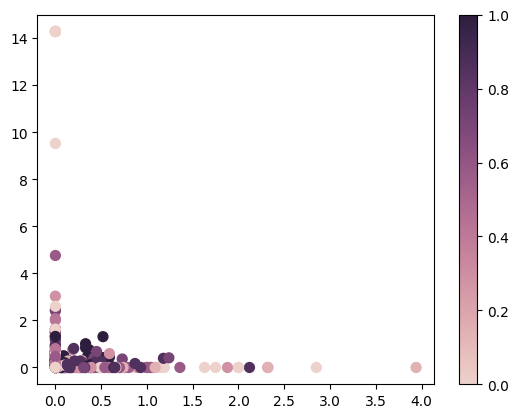

In [34]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

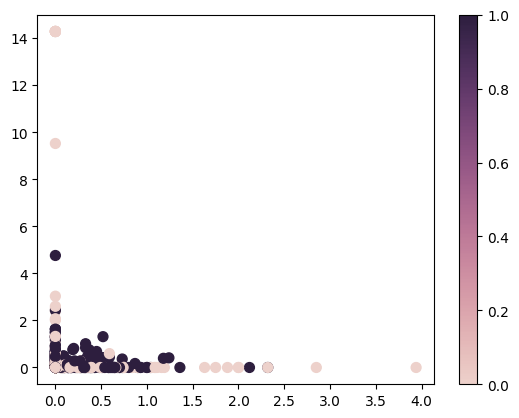

In [35]:
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
    X_test[:, 0], X_test[:, 1], c=y_test, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [36]:
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [37]:
gridsearch.best_params_

{'n_neighbors': 7}

In [38]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
GridsearchCV_k = test_rmse
print(train_rmse)
print(test_rmse)

0.32279729286409825
0.38694487985683385


Adding Weighted Average of Neighbors Based on Distance


In [39]:
parameters = {
    "n_neighbors": range(1, 50),
    "weights": ["uniform", "distance"],
}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, y_train)
gridsearch.best_params_
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
GridsearchCV_k_weights = test_rmse
test_rmse

0.3529176019362071

Further Improving on kNN in scikit-learn With Bagging

In [40]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsRegressor(
    n_neighbors=best_k, weights=best_weights)

In [41]:
bagging_model = BaggingRegressor(bagged_knn, n_estimators=100)

In [42]:
bagging_model.fit(X_train, y_train)

test_preds_grid = bagging_model.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
Bagging_and_GridSearchCV = test_rmse
test_rmse

0.3554820617474365

In [43]:
print("Arbitrary k: ", Arbitrary_k)
print("GridSearchCV for k: ", GridsearchCV_k )
print("GridSearchCV for k and weights: ", GridsearchCV_k_weights)
print("Bagging and GridSearchCV: ", Bagging_and_GridSearchCV)

Arbitrary k:  0.38694487985683385
GridSearchCV for k:  0.38694487985683385
GridSearchCV for k and weights:  0.3529176019362071
Bagging and GridSearchCV:  0.3554820617474365


#### 6. Deployment <a id='deployment'></a>